# Dataset Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir dataset
!cp /content/drive/MyDrive/Capstone/dataset/symptoms.csv dataset/symptoms.csv
!mkdir export

# Setup

In [4]:
!pip install tensorflow==2.10
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 42.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing install

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
DATASET_PATH = 'dataset/symptoms.csv'
SPLIT_SIZE = 0.2

# Data Processing

Read CSV and convert the content to float64

In [3]:
df = pd.read_csv(DATASET_PATH).astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sleep_deprv      16 non-null     float64
 1   itchy_eye        16 non-null     float64
 2   dry_eye          16 non-null     float64
 3   light_sensitive  16 non-null     float64
 4   burn_sensation   16 non-null     float64
 5   eye_tears        16 non-null     float64
 6   blurry_vision    16 non-null     float64
 7   eye_condition    16 non-null     float64
 8   diagnosis        16 non-null     float64
dtypes: float64(9)
memory usage: 1.2 KB


In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=SPLIT_SIZE, random_state=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12, 8)
(12,)
(4, 8)
(4,)


# Model Setup

In [5]:
class CustomCallback(tf.keras.callbacks.Callback):
  def __init__(self):
    super(CustomCallback, self).__init__()
    self.prev_acc = 0.0

  def on_epoch_end(self, epoch, logs=None):
    self.prev_acc = logs['accuracy']

    # Early stop when there is no accuracy or loss improvement
    # if epoch > 30 and self.prev_acc < 0.8:
    #   self.model.stop_training = True
    #   print("\nStopped the training because there is no improvement")

    # Early stop when the model has achieved the desired accuracy
    # if logs['accuracy'] >= 0.9 and logs['loss'] < 0.01:
    #   self.model.stop_training = True
    #   print("\nAlready met the desired accuracy")

In [6]:
tf.keras.backend.clear_session()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,329 (138.00 KB)

 Trainable params: 35,329 (138.00 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [8]:
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0158),
    metrics=['accuracy', 'mse']
)

model_obj = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[CustomCallback()]
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4167 - loss: 18.7481 - mse: 0.2639 - val_accuracy: 1.0000 - val_loss: 12.6415 - val_mse: 0.2266
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7500 - loss: 12.6456 - mse: 0.2349 - val_accuracy: 1.0000 - val_loss: 8.0861 - val_mse: 0.2159
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8333 - loss: 8.0888 - mse: 0.2215 - val_accuracy: 0.7500 - val_loss: 4.8997 - val_mse: 0.2032
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5833 - loss: 4.9066 - mse: 0.2169 - val_accuracy: 0.7500 - val_loss: 2.8317 - val_mse: 0.1959
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.5833 - loss: 2.8431 - mse: 0.2186 - val_accuracy: 0.7500 - val_loss: 1.6262 - val_mse: 0.1931
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.5833 - loss: 1.6403 - mse: 0.2214 - val_accuracy: 0.7500 - val_loss: 1.0658 - val_mse: 0.1943
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/st

# Model Tuning (Experiment)
> This section is only for experiment. Therefore, optional. Make sure you haven't compile or train the model yet!

In [ ]:
# Learning rate scheduler

tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.1), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch / 20))

model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy', 'mse']
)

model_obj = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[lr_schedule]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,329 (138.00 KB)

 Trainable params: 35,329 (138.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 18.6874 - mse: 0.2469 - val_accuracy: 0.7500 - val_loss: 18.6772 - val_mse: 0.2354 - learning_rate: 1.0000e-05
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.5833 - loss: 18.6830 - mse: 0.2469 - val_accuracy: 0.7500 - val_loss: 18.6723 - val_mse: 0.2354 - learning_rate: 1.1220e-05
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5833 - loss: 18.6780 - mse: 0.2468 - val_accuracy: 0.7500 - val_loss: 18.6668 - val_mse: 0.2354 - learning_rate: 1.2589e-05
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5833 - loss: 18.6725 - mse: 0.2468 - val_accuracy: 0.7500 - val_loss: 18.6606 - val_mse: 0.2354 - learning_rate: 1.4125e-05
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5833 - loss: 18.6663 - mse: 0.2468 - val_accuracy: 0.7500 - val_loss: 18.6536 - val_mse: 0.2354 - learning_rate: 1.5849e-05
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy

# Model Evaluation


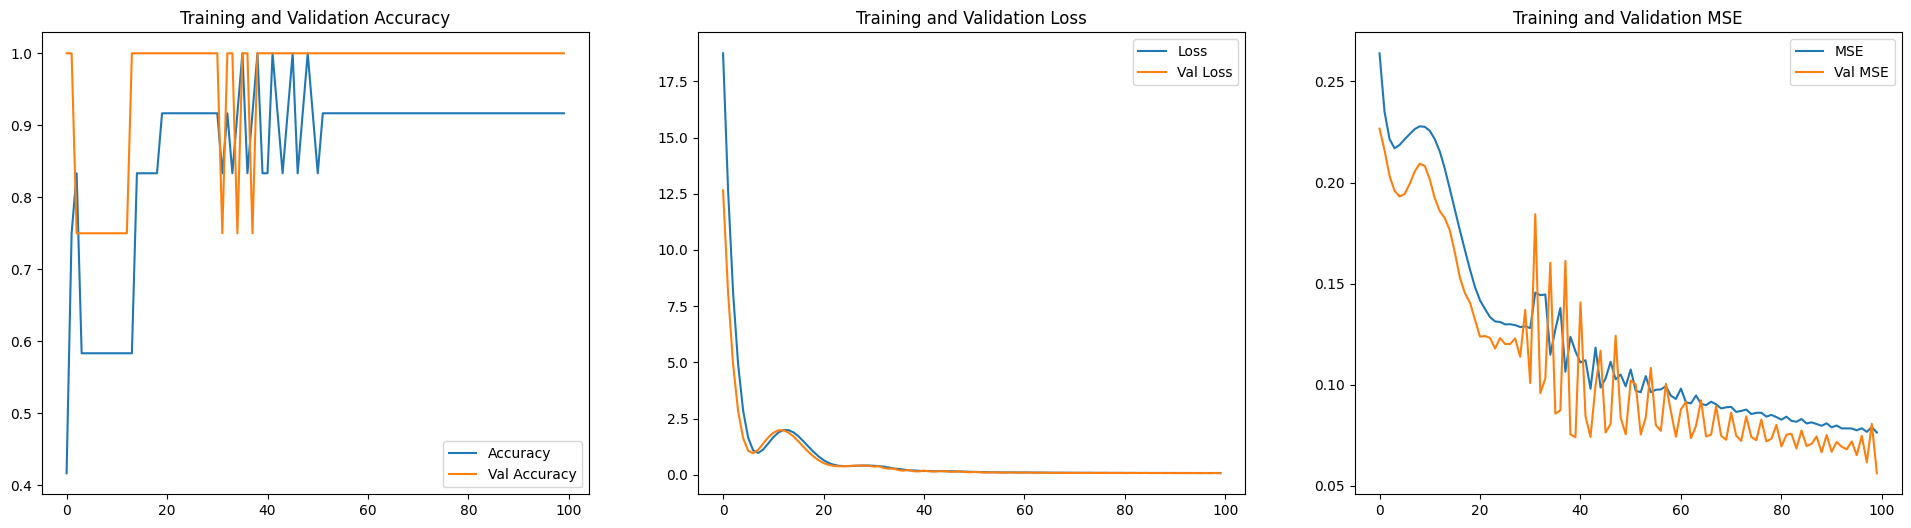

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].plot(model_obj.history['accuracy'], label='Accuracy')
ax[0].plot(model_obj.history['val_accuracy'], label='Val Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()

ax[1].plot(model_obj.history['loss'], label='Loss')
ax[1].plot(model_obj.history['val_loss'], label='Val Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()

ax[2].plot(model_obj.history['mse'], label='MSE')
ax[2].plot(model_obj.history['val_mse'], label='Val MSE')
ax[2].set_title('Training and Validation MSE')
ax[2].legend()

plt.show()

# Predict

In [10]:
for x in x_test.to_numpy():
  print(f"\n{x}")
  prediction = model.predict(tf.constant([x]), verbose=0)[0][0]

  print("Diagnosis: {}".format("Positive" if (prediction > 0.5) else "Negative"))
  print(f"Prediction: {prediction}")


[1. 1. 1. 1. 1. 1. 1. 0.]
Diagnosis: Positive
Prediction: 0.7278084754943848

[0. 0. 0. 0. 0. 0. 0. 1.]
Diagnosis: Negative
Prediction: 0.16987290978431702

[0. 0. 0. 0. 1. 0. 0. 1.]
Diagnosis: Negative
Prediction: 0.3014797568321228

[0. 0. 0. 1. 0. 0. 1. 0.]
Diagnosis: Negative
Prediction: 0.17623689770698547


# Model Export

In [12]:
tfjs.converters.save_keras_model(model, "./export")

failed to lookup keras version from the file,
    this is likely a weight only file
